# **Videogame sales analysis**
----

1. `Name` - The name of a video game.

2. `Platform` - The platform (PC, PS4, XBox etc.) for which a game is released.

3. `Year` - The release year of a video game.

4. `Genre` - The genre of a video game.

5. `Publisher` - The publisher of a video game.

6. `NA_Sales` - Approximately, the total number of units sold (in million) of a video game in North America.

7. `EU_Sales` - Approximately, the total number of units sold (in million) of a video game in Europe.

8. `JP_Sales` - Approximately, the total number of units sold (in million) of a video game in Japan.

9. `Other_Sales` - Approximately, the total number of units sold (in million) of a video game in the rest of the world.

10. `Global_Sales` - Approximately, the total number of units sold (in million) of a video game all over the world.

11. `Critic_score` - Aggregate score compiled by Metacritic staff

12. `User_score` - Score by Metacritic's subscribers

13. `User_count` - Number of users who gave the user_score

14. `Developer` - Party responsible for creating the game

15. `Rating` - The ESRB ratings

## Importing necessary Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

----
# Data Extraction

In [2]:
vg_df=pd.read_csv('VideogameSales.csv')
vg_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Number of rows :",vg_df.shape[0])
print("Number of columns :",vg_df.shape[1])

Number of rows : 16719
Number of columns : 16


----
# Data Cleaning

In [4]:
vg_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [5]:
vg_df=vg_df.drop(['Critic_Count'],axis=1)
vg_df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [6]:
vg_df=vg_df.dropna(subset=['Year_of_Release'])
vg_df=vg_df.dropna(subset=['Rating'])
vg_df=vg_df.dropna(subset=['Publisher'])
vg_df=vg_df.dropna(subset=['Genre'])
vg_df.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       1866
User_Score         2389
User_Count         2389
Developer             0
Rating                0
dtype: int64

In [7]:
vg_df.shape

(9767, 15)

In [8]:
critic_mean=vg_df['Critic_Score'].mean()
user_mean=vg_df['User_Score'].mean()
uc_mean=vg_df['User_Count'].mean()

In [9]:
null_critic=vg_df[vg_df['Critic_Score'].isnull()==True].index
null_user=vg_df[vg_df['User_Score'].isnull()==True].index
null_uc=vg_df[vg_df['User_Count'].isnull()==True].index
null_dev=vg_df[vg_df['Developer'].isnull()==True].index

In [10]:
vg_df.loc[null_critic,'Critic_Score']=critic_mean
vg_df.loc[null_user,'User_Score']=user_mean
vg_df.loc[null_uc,'User_Count']=uc_mean
vg_df.loc[null_dev,'Developer']="Not Recognised"

In [11]:
vg_df['Year_of_Release'] = vg_df['Year_of_Release'].astype(int)
vg_df = vg_df[(vg_df['Year_of_Release'] >= 1985) & (vg_df['Year_of_Release'] <= 2016)]

In [12]:
vg_df.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [13]:
vg_df.shape

(9766, 15)

In [14]:
vg_df.to_csv('cleanvg.csv')

----
# Questions



***1. Which genre of videogames is the most liked?***

`Ans:` Roleplaying

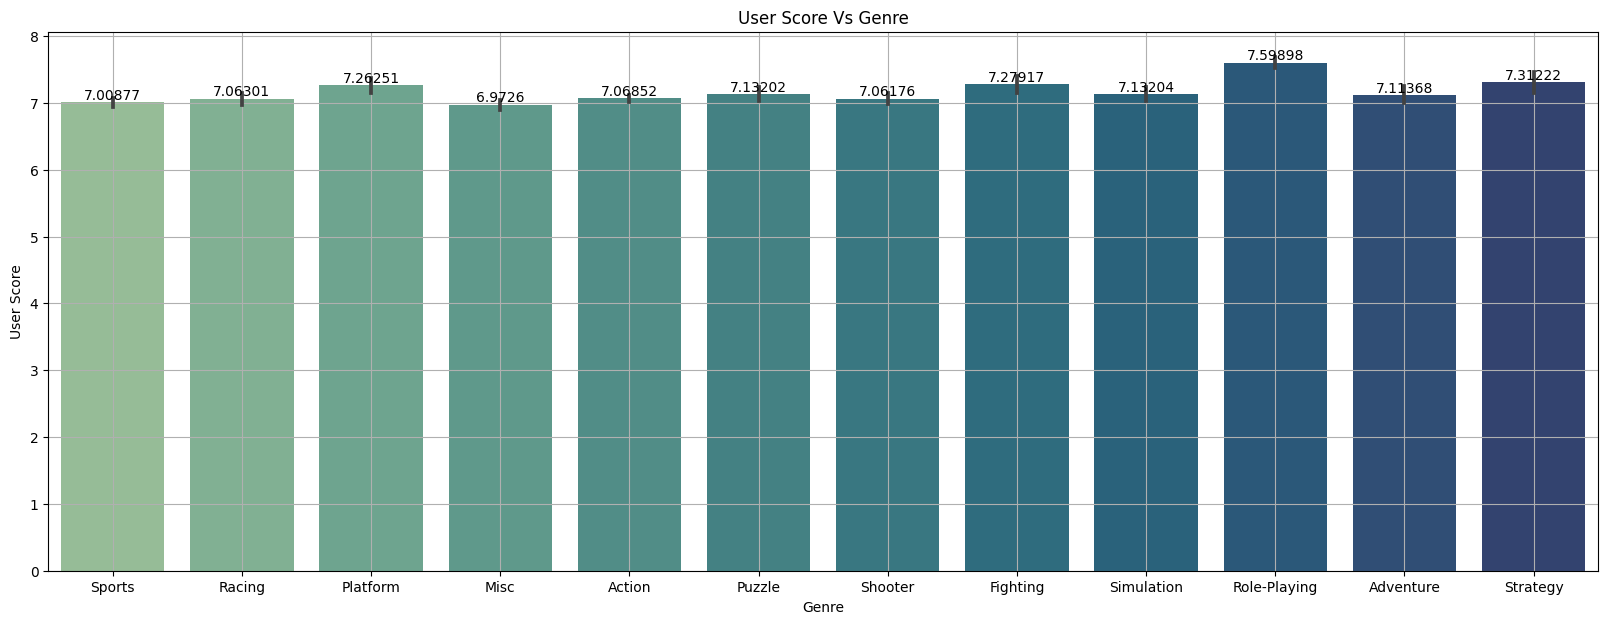

In [63]:
plt.figure(figsize=(20,7))
plt.title("User Score Vs Genre")
t1=sns.barplot(x='Genre',y='User_Score',data=vg_df,palette="crest")
plt.ylabel('User Score')
plt.xlabel("Genre")
plt.grid()
for i in t1.containers:
    t1.bar_label(i,)
plt.show()

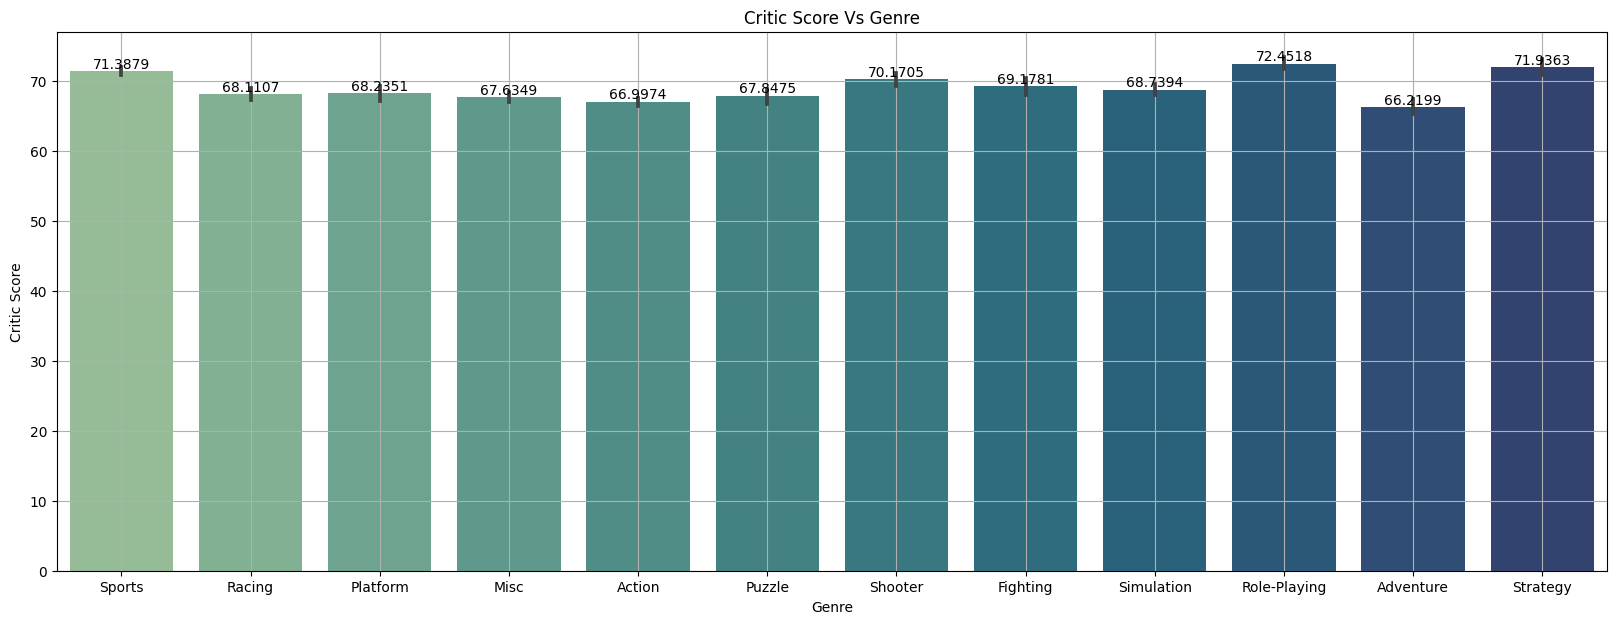

In [16]:
plt.figure(figsize=(20,7))
plt.title("Critic Score Vs Genre")
t1=sns.barplot(x='Genre',y='Critic_Score',data=vg_df,palette="crest")
plt.ylabel('Critic Score')
plt.xlabel("Genre")
plt.grid()
for i in t1.containers:
    t1.bar_label(i,)
plt.show()

***2. Which platform is the most used for playing games?***

`Ans:` PC

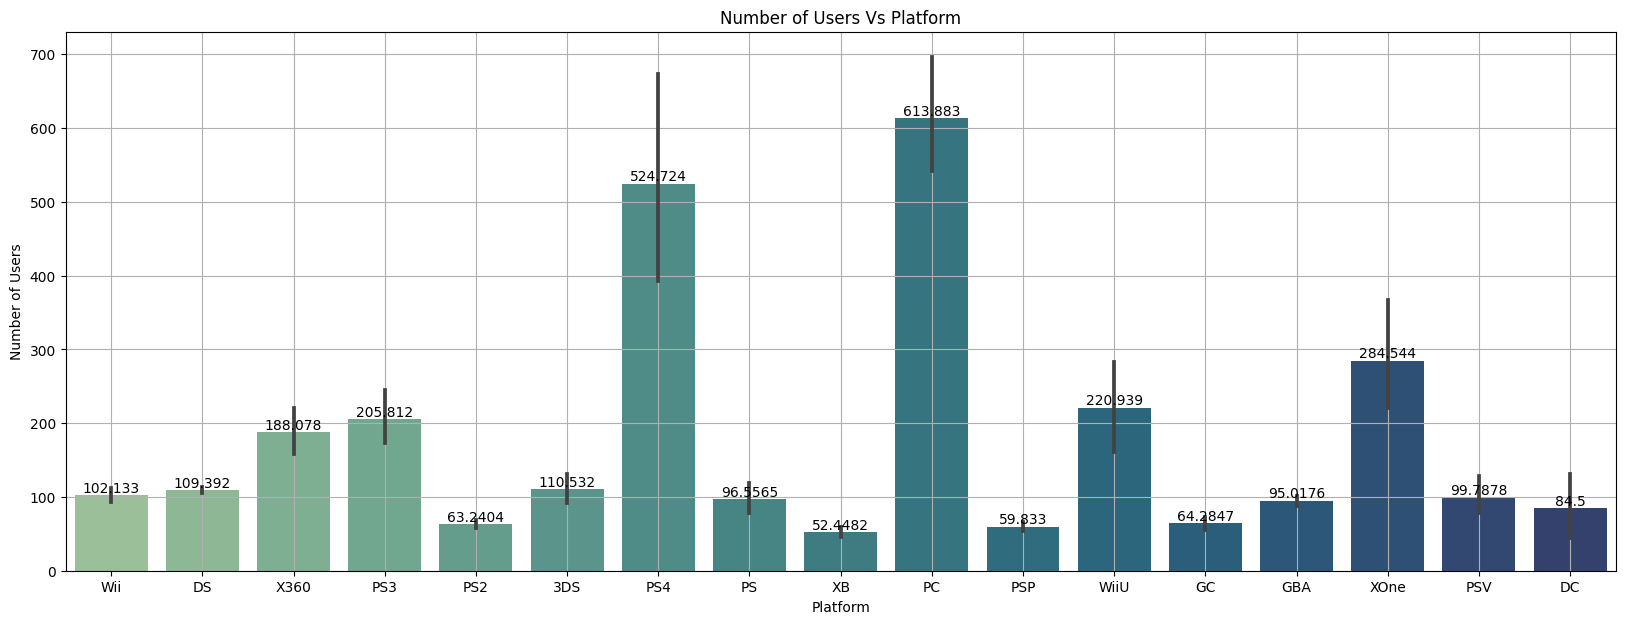

In [17]:
plt.figure(figsize=(20,7))
plt.title("Number of Users Vs Platform")
t1=sns.barplot(x='Platform',y='User_Count',data=vg_df,palette="crest")
plt.grid()
plt.xlabel("Platform")
plt.ylabel('Number of Users')
for i in t1.containers:
    t1.bar_label(i,)
plt.show()

***3. Which developer has released the most highly-rated games?(with a critic score above 90)***

`Ans:` Rockstar North

In [18]:
# Step 1: Filter games with critic score above 90
filtered_data = vg_df[vg_df['Critic_Score'] > 90]

# Step 2: Group by 'Developer' column and count the number of games
developers_counts = filtered_data.groupby('Developer').size().reset_index(name='Count')

# Step 3: Sort developers in descending order based on game count
sorted_developers = developers_counts.sort_values('Count', ascending=False)

# Step 4: Select top 3 developers
top_3_developers = sorted_developers.head(3)

# Step 5: Retrieve game names for each developer
for index, row in top_3_developers.iterrows():
    developer = row['Developer']
    developer_games = filtered_data[filtered_data['Developer'] == developer]
    
    # Step 6: Print the game names and critic scores for each developer
    print(f"Developer: {developer}")
    for game_index, game_row in developer_games.iterrows():
        game_name = game_row['Name']
        critic_score = game_row['Critic_Score']
        print(f"Game: {game_name} - {critic_score}")
    print()


Developer: Rockstar North
Game: Grand Theft Auto V - 97.0
Game: Grand Theft Auto: San Andreas - 95.0
Game: Grand Theft Auto V - 97.0
Game: Grand Theft Auto: Vice City - 95.0
Game: Grand Theft Auto V - 97.0
Game: Grand Theft Auto IV - 98.0
Game: Grand Theft Auto IV - 98.0
Game: Grand Theft Auto V - 97.0
Game: Grand Theft Auto: San Andreas - 93.0
Game: Grand Theft Auto V - 96.0
Game: Grand Theft Auto: San Andreas - 93.0
Game: Grand Theft Auto: Vice City - 94.0

Developer: Nintendo
Game: Mario Kart DS - 91.0
Game: Super Mario Galaxy - 97.0
Game: The Legend of Zelda: Twilight Princess - 95.0
Game: Super Mario Sunshine - 92.0
Game: The Legend of Zelda: The Wind Waker - 96.0
Game: Super Mario 3D World - 93.0
Game: The Legend of Zelda: Skyward Sword - 93.0
Game: The Legend of Zelda: A Link Between Worlds - 91.0
Game: Metroid Fusion - 92.0
Game: The Legend of Zelda: Twilight Princess - 96.0

Developer: BioWare
Game: Mass Effect 2 - 96.0
Game: Mass Effect 3 - 93.0
Game: Mass Effect - 91.0
Game:

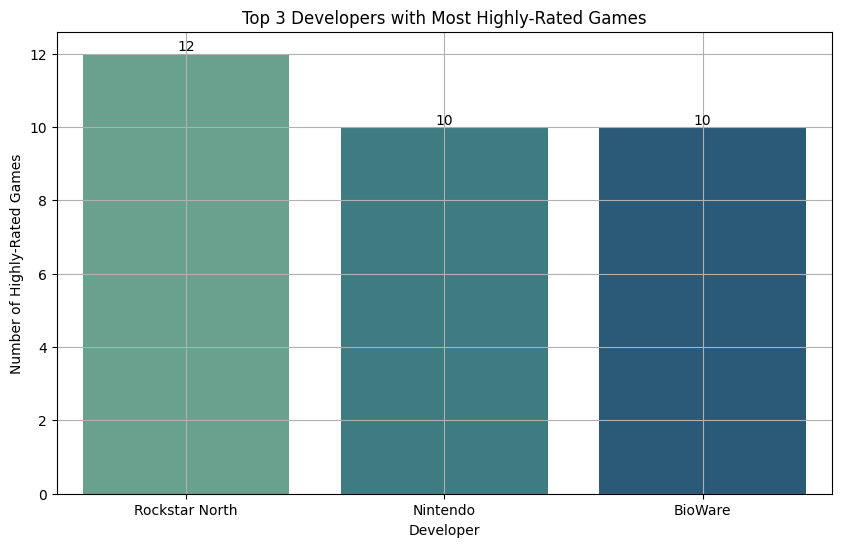

In [43]:
# Step 1: Filter games with critic score above 90
filtered_data = vg_df[vg_df['Critic_Score'] > 90]

# Step 2: Group by 'Developer' column and count the number of games
developers_counts = filtered_data.groupby('Developer').size().reset_index(name='Count')

# Step 3: Sort developers in descending order based on game count
sorted_developers = developers_counts.sort_values('Count', ascending=False)

# Step 4: Select top 3 developers
top_3_developers = sorted_developers.head(3)

# Step 5: Create a bar plot
plt.figure(figsize=(10, 6))
t1=sns.barplot(x='Developer',y='Count',data=top_3_developers,palette="crest")
plt.xlabel('Developer')
plt.ylabel('Number of Highly-Rated Games')
plt.title('Top 3 Developers with Most Highly-Rated Games')
for i in t1.containers:
    t1.bar_label(i,)
plt.grid()
plt.show()


***4. Which year had the highest number of game releases?***

`Ans:` 2009

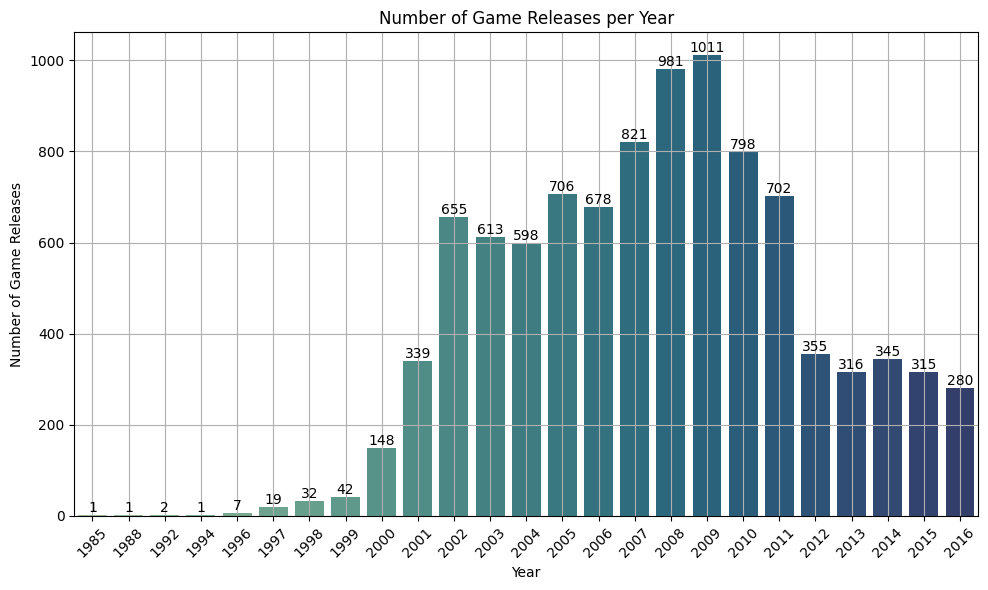

In [42]:
# Step 1: Group the dataset by the 'Year_of_Release' column and calculate the count of game releases
grouped_df = vg_df.groupby('Year_of_Release').size().reset_index(name='Count')

# Step 2: Sort the years based on the count of game releases in descending order
sorted_df = grouped_df.sort_values('Count', ascending=False)

# Step 3: Create a bar plot using seaborn to visualize the number of game releases per year
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
t1=sns.barplot(data=sorted_df, x='Year_of_Release', y='Count',palette="crest")
plt.xlabel('Year')
plt.ylabel('Number of Game Releases')
plt.title('Number of Game Releases per Year')
plt.xticks(rotation=45)  # Rotate x-axis tick labels by 45 degrees
plt.grid()

for i in t1.containers:
    t1.bar_label(i,)

# Step 4: Display the plot
plt.tight_layout()  # Adjust the spacing
plt.show()

***5. What are the most liked and most disliked videogames?***

`Ans:`

Most Liked Game:

Name: Breath of Fire III

User Score: 9.7


Most Disliked Game:

Name: My Little Pony: Pinkie Pie's Party

User Score: 0.0

In [22]:
# Step 1: Sort the dataset by User_score in descending order
sorted_df = vg_df.sort_values(['User_Score','Critic_Score'], ascending=[False,False])

# Step 2: Retrieve the most liked game (highest User_score)
most_liked_game = sorted_df.iloc[0]

# Step 3: Retrieve the most disliked game (lowest User_score)
most_disliked_game = sorted_df.iloc[-1]

# Step 4: Print the most liked and most disliked games
print("Most Liked Game:")
print("Name:", most_liked_game['Name'])
print("User Score:", most_liked_game['User_Score'])
print()
print("Most Disliked Game:")
print("Name:", most_disliked_game['Name'])
print("User Score:", most_disliked_game['User_Score'])


Most Liked Game:
Name: Breath of Fire III
User Score: 9.7

Most Disliked Game:
Name: My Little Pony: Pinkie Pie's Party
User Score: 0.0


***6. How does the distribution of sales vary across different regions?***

`Ans:` Maximum Number of sales in North America, Least in Japan

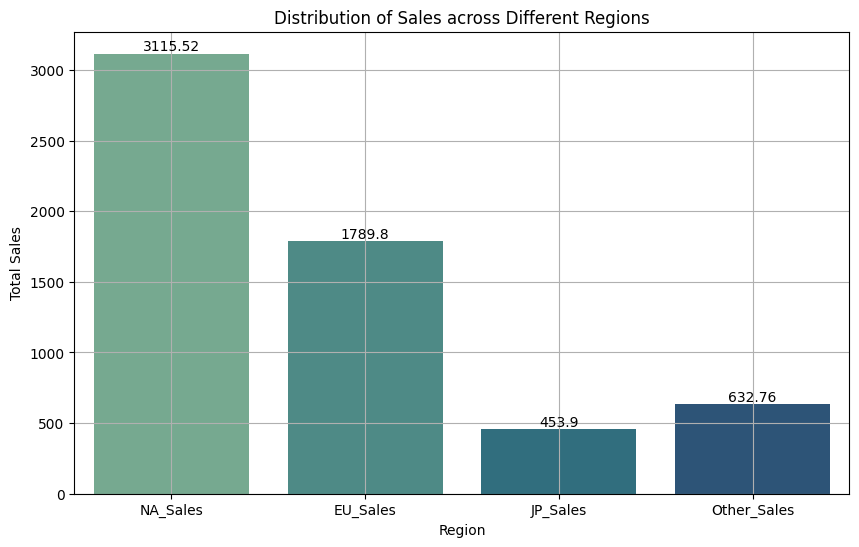

In [23]:
# Step 1: Select the columns related to sales in different regions
sales_df = vg_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Step 2: Calculate the total sales for each region
total_sales = sales_df.sum()

# Step 3: Create a bar plot to visualize the distribution of sales across different regions
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
t1=sns.barplot(x=total_sales.index, y=total_sales.values, palette='crest')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Distribution of Sales across Different Regions')
plt.grid()
for i in t1.containers:
    t1.bar_label(i,)
# Step 4: Display the plot
plt.show()


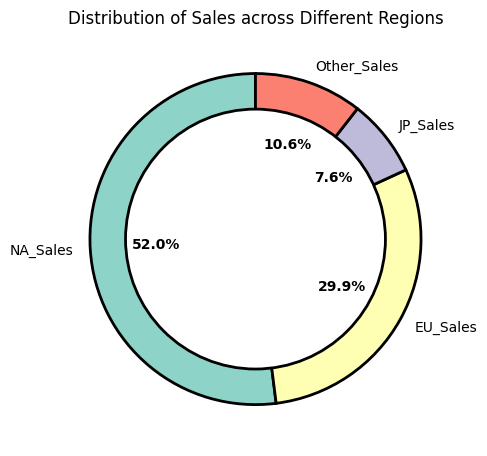

In [65]:
# Step 1: Select the columns related to sales in different regions
sales_df = vg_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

# Step 2: Calculate the total sales for each region
total_sales = sales_df.sum()

# Step 3: Create a pie chart to visualize the distribution of sales across different regions
plt.figure(figsize=(5, 5))  # Adjust the figure size as needed

# Create the pie chart with borders
colors = plt.cm.Set3(range(len(total_sales.index)))
_, _, autotexts = plt.pie(total_sales, labels=total_sales.index, autopct='%1.1f%%', startangle=90, colors=colors,
                          wedgeprops={'linewidth': 2, 'edgecolor': 'black'})

# Set properties for the percentage labels
plt.setp(autotexts, size=10, weight='bold')
# Set the title of the pie chart
plt.title('Distribution of Sales across Different Regions')

# Draw a white circle in the center to create a donut plot
centre_circle = plt.Circle((0, 0), 0.785, fc='white',linewidth=2, edgecolor='black')
plt.gca().add_artist(centre_circle)

# Step 4: Display the plot
plt.tight_layout()  # Adjust the spacing
plt.show()


***7. Which year had the highest total global sales?***

`Ans:` 

```Year with the Highest Total Global Sales:
Year: 2008.0
Total Global Sales: 588.34

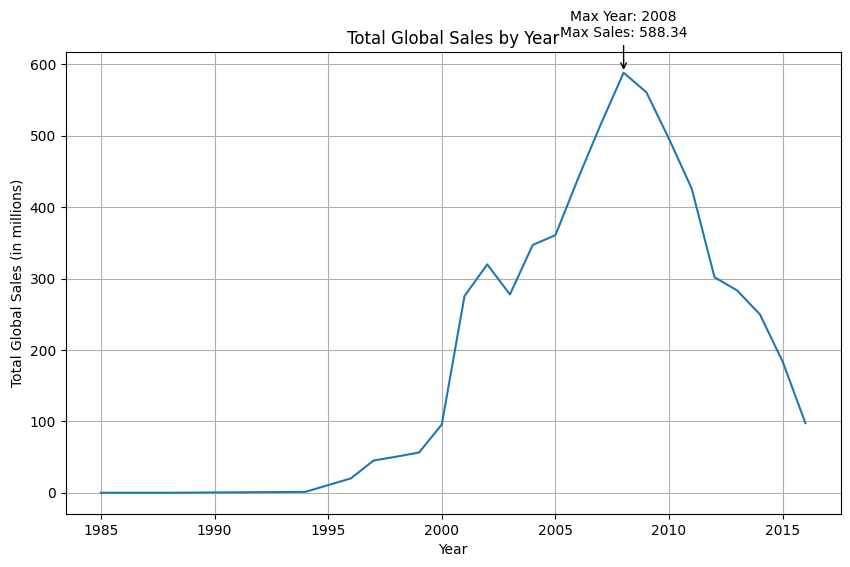

In [53]:
# Step 1: Group the data by the 'Year_of_Release' column and calculate the sum of 'Global_Sales' for each year
yearly_sales = vg_df.groupby('Year_of_Release')['Global_Sales'].sum().reset_index()

# Step 2: Sort the data by the 'Year_of_Release' column in ascending order
sorted_sales = yearly_sales.sort_values('Year_of_Release')

# Step 3: Create a line plot using seaborn to visualize the total global sales over the years
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.lineplot(data=sorted_sales, x='Year_of_Release', y='Global_Sales',hue=None)
plt.xlabel('Year')
plt.ylabel('Total Global Sales (in millions)')
plt.title('Total Global Sales by Year')

# Step 4: Find the maximum year and its corresponding global sales
max_year = sorted_sales.loc[sorted_sales['Global_Sales'].idxmax(), 'Year_of_Release']
max_sales = sorted_sales.loc[sorted_sales['Global_Sales'].idxmax(), 'Global_Sales']
plt.grid()
# Step 5: Annotate the maximum year and its sales on the plot
plt.annotate(f"Max Year: {max_year}\nMax Sales: {max_sales}", xy=(max_year, max_sales),
             xytext=(max_year, max_sales + 50), ha='center',
             arrowprops=dict(facecolor='black', arrowstyle='->'))

# Step 6: Display the plot
plt.show()


**8. Which developer has released the most games?**

`Ans:` Ubisoft with 200 games

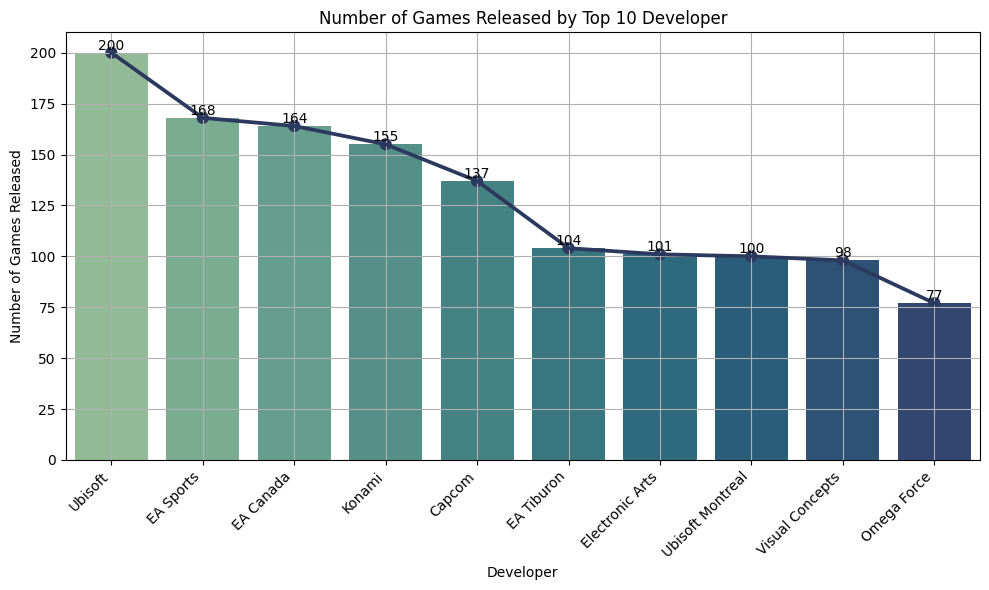

In [28]:
# Step 1: Group the dataset by the 'Publisher' column and calculate the count of games released
grouped_df = vg_df.groupby('Developer').size().reset_index(name='Count')

# Step 2: Sort the publishers based on the count of games in descending order
sorted_df = grouped_df.sort_values('Count', ascending=False)

# Step 3: Select only the top 10 publishers
top_10_publishers = sorted_df.head(10)

# Step 4: Create a bar plot to visualize the number of games released by each publisher
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
t1=sns.barplot(data=top_10_publishers, x='Developer', y='Count', palette='crest')
sns.pointplot(data=top_10_publishers, x='Developer', y='Count',color='#2b395e')
plt.xlabel('Developer')
plt.ylabel('Number of Games Released')
plt.title('Number of Games Released by Top 10 Developer')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis tick labels for better readability
plt.grid()
for i in t1.containers:
    t1.bar_label(i)

# Step 5: Display the plot
plt.tight_layout()  # Adjust the spacing
plt.show()


**9. What are the highest rated games in each genre?**

`Ans:`

In [29]:
# Step 1: Group the dataset by the 'Genre' column
grouped_df = vg_df.groupby('Genre')

# Step 2: Iterate over each group and retrieve the highest rated game for each genre
highest_rated_games = []
for genre, group in grouped_df:
    highest_rated_game = group.sort_values('Critic_Score', ascending=False).iloc[0]
    highest_rated_games.append(highest_rated_game)

# Step 3: Create a new DataFrame with the highest rated games in each genre
highest_rated_games_df = pd.DataFrame(highest_rated_games)

# Step 4: Print the highest rated games in each genre
for index, row in highest_rated_games_df.iterrows():
    genre = row['Genre']
    game_name = row['Name']
    critic_score = row['Critic_Score']
    print(f"Highest Rated Game in {genre} genre: {game_name} - Critic Score: {critic_score}")


Highest Rated Game in Action genre: Grand Theft Auto IV - Critic Score: 98.0
Highest Rated Game in Adventure genre: Metal Gear Solid: The Legacy Collection - Critic Score: 93.0
Highest Rated Game in Fighting genre: SoulCalibur - Critic Score: 98.0
Highest Rated Game in Misc genre: Rock Band 3 - Critic Score: 93.0
Highest Rated Game in Platform genre: Super Mario Galaxy - Critic Score: 97.0
Highest Rated Game in Puzzle genre: World of Goo - Critic Score: 90.0
Highest Rated Game in Racing genre: Gran Turismo - Critic Score: 96.0
Highest Rated Game in Role-Playing genre: Mass Effect 2 - Critic Score: 96.0
Highest Rated Game in Shooter genre: Metroid Prime - Critic Score: 97.0
Highest Rated Game in Simulation genre: The Sims Deluxe - Critic Score: 92.0
Highest Rated Game in Sports genre: Tony Hawk's Pro Skater 2 - Critic Score: 98.0
Highest Rated Game in Strategy genre: Sid Meier's Civilization IV - Critic Score: 94.0


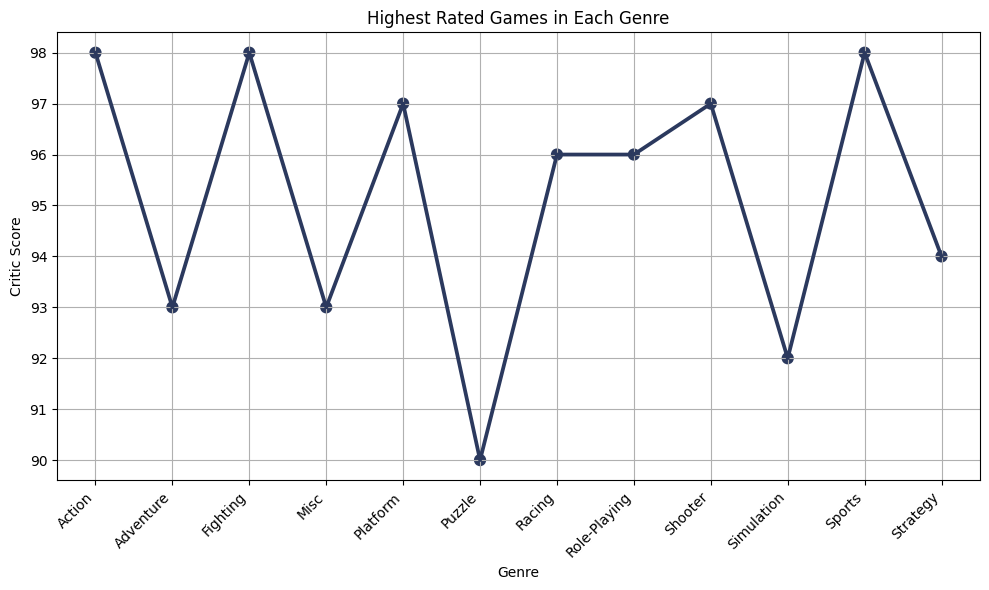

In [31]:
# Step 1: Group the dataset by the 'Genre' column
grouped_df = vg_df.groupby('Genre')

# Step 2: Retrieve the highest rated game for each genre
highest_rated_games = grouped_df.apply(lambda x: x.loc[x['Critic_Score'].idxmax()])

# Step 3: Create a point plot to visualize the highest rated games in each genre
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
t1=sns.pointplot(data=highest_rated_games, x='Genre', y='Critic_Score', color='#2b395e')
plt.xlabel('Genre')
plt.ylabel('Critic Score')
plt.title('Highest Rated Games in Each Genre')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis tick labels for better readability
plt.grid()
# Step 4: Display the plot
plt.tight_layout()  # Adjust the spacing
plt.show()


**10. What is the most common ESRB rating among the games?**

`Ans:` E

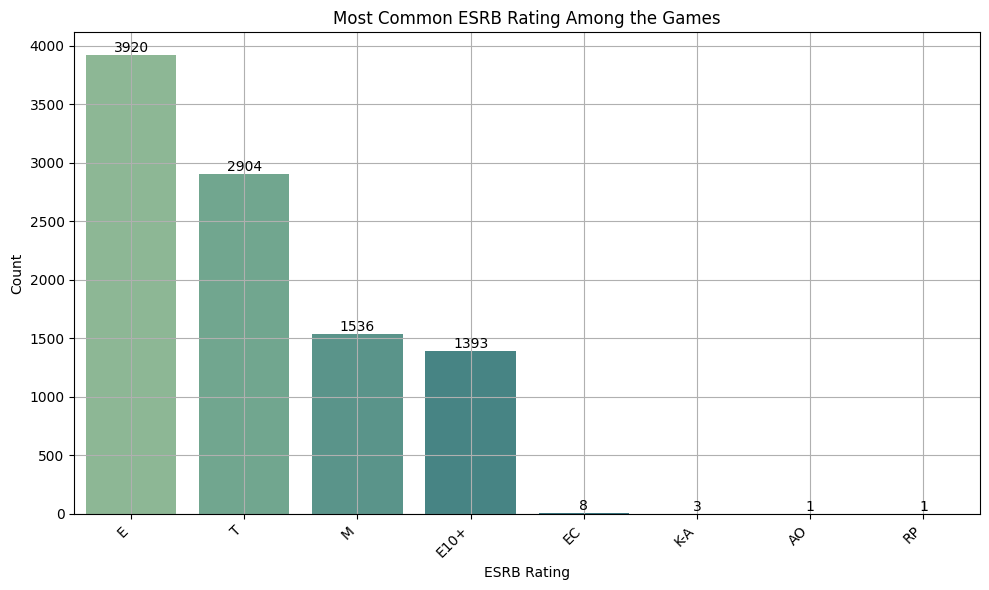

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataset is stored in a pandas DataFrame called 'vg_df'

# Step 1: Count the occurrences of each ESRB rating
esrb_counts = vg_df['Rating'].value_counts()

# Step 2: Create a bar plot to visualize the ESRB ratings
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
t1=sns.barplot(x=esrb_counts.index, y=esrb_counts.values, palette='crest')
plt.xlabel('ESRB Rating')
plt.ylabel('Count')
plt.title('Most Common ESRB Rating Among the Games')
plt.grid()
for i in t1.containers:
    t1.bar_label(i,)
# Step 3: Display the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust the spacing
plt.show()


**11. What is the best game in each ESRB Rating?**

`Ans:`

Best Game in AO rating: Grand Theft Auto: San Andreas - Critic Score: 93.0

Best Game in E rating: Super Mario Galaxy - Critic Score: 97.0

Best Game in E10+ rating: Portal 2 - Critic Score: 95.0

Best Game in EC rating: Nickelodeon Team Umizoomi - Critic Score: 68.99

Best Game in K-A rating: PaRappa The Rapper - Critic Score: 92.0

Best Game in M rating: Grand Theft Auto IV - Critic Score: 98.0

Best Game in RP rating: Supreme Ruler: Cold War - Critic Score: 63.0

Best Game in T rating: Tony Hawk's Pro Skater 2 - Critic Score: 98.0

In [56]:
# Step 1: Group the dataset by the 'Rating' column
grouped_df = vg_df.groupby('Rating')

# Step 2: Find the game with the highest critic score for each rating
best_games = grouped_df.apply(lambda x: x.loc[x['Critic_Score'].idxmax()])

# Step 3: Print the best game in each ESRB rating
for index, row in best_games.iterrows():
    rating = index
    game_name = row['Name']
    critic_score = row['Critic_Score']
    print(f"Best Game in {rating} rating: {game_name} - Critic Score: {round(critic_score,1)}")


Best Game in AO rating: Grand Theft Auto: San Andreas - Critic Score: 93.0
Best Game in E rating: Super Mario Galaxy - Critic Score: 97.0
Best Game in E10+ rating: Portal 2 - Critic Score: 95.0
Best Game in EC rating: Nickelodeon Team Umizoomi - Critic Score: 69.0
Best Game in K-A rating: PaRappa The Rapper - Critic Score: 92.0
Best Game in M rating: Grand Theft Auto IV - Critic Score: 98.0
Best Game in RP rating: Supreme Ruler: Cold War - Critic Score: 63.0
Best Game in T rating: Tony Hawk's Pro Skater 2 - Critic Score: 98.0


**12. What are some popular games in PC, PS4, GBA, X360?**

`Ans:`

Top Games for PC:
The Sims 3 - Global Sales: 8.01
World of Warcraft - Global Sales: 6.29
Diablo III - Global Sales: 5.14

Top Games for PS4:
Grand Theft Auto V - Global Sales: 12.61
FIFA 16 - Global Sales: 8.57
Call of Duty: Advanced Warfare - Global Sales: 7.66

Top Games for GBA:
Pokémon Emerald Version - Global Sales: 6.41
Super Mario Advance - Global Sales: 5.49
Mario Kart: Super Circuit - Global Sales: 5.47

Top Games for X360:
Kinect Adventures! - Global Sales: 21.81
Grand Theft Auto V - Global Sales: 16.27
Call of Duty: Modern Warfare 3 - Global Sales: 14.73

In [36]:
# Step 1: Filter the dataset to include only the desired platforms
platforms = ['PC', 'PS4', 'GBA', 'X360']
filtered_df = vg_df[vg_df['Platform'].isin(platforms)]

# Step 2: Sort the filtered dataset by the "Global_Sales" column in descending order
sorted_df = filtered_df.sort_values('Global_Sales', ascending=False)

# Step 3: Retrieve the top three games from each platform
top_games_per_platform = sorted_df.groupby('Platform').head(3)

# Step 4: Print the three most popular games for each platform
for platform in platforms:
    platform_games = top_games_per_platform[top_games_per_platform['Platform'] == platform]
    game_names = platform_games['Name']
    global_sales = platform_games['Global_Sales']
    print(f"Top Games for {platform}:")
    for game_name, sales in zip(game_names, global_sales):
        print(f"{game_name} - Global Sales: {sales}")
    print()


Top Games for PC:
The Sims 3 - Global Sales: 8.01
World of Warcraft - Global Sales: 6.29
Diablo III - Global Sales: 5.14

Top Games for PS4:
Grand Theft Auto V - Global Sales: 12.61
FIFA 16 - Global Sales: 8.57
Call of Duty: Advanced Warfare - Global Sales: 7.66

Top Games for GBA:
Pokémon Emerald Version - Global Sales: 6.41
Super Mario Advance - Global Sales: 5.49
Mario Kart: Super Circuit - Global Sales: 5.47

Top Games for X360:
Kinect Adventures! - Global Sales: 21.81
Grand Theft Auto V - Global Sales: 16.27
Call of Duty: Modern Warfare 3 - Global Sales: 14.73



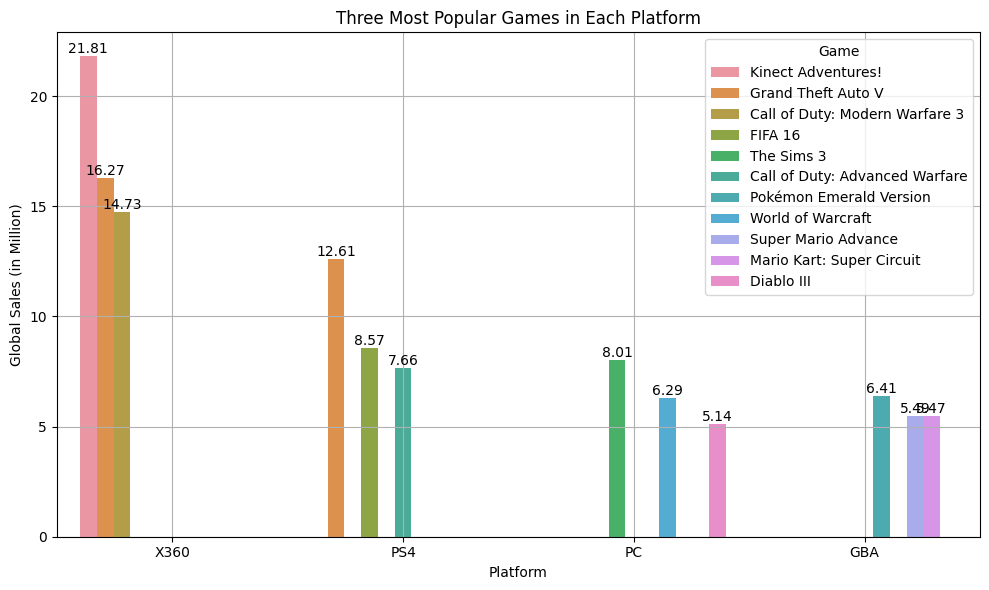

In [57]:
# Step 1: Filter the dataset to include only the desired platforms
platforms = ['PC', 'PS4', 'GBA', 'X360']
filtered_df = vg_df[vg_df['Platform'].isin(platforms)]

# Step 2: Sort the filtered dataset by the "Global_Sales" column in descending order
sorted_df = filtered_df.sort_values('Global_Sales', ascending=False)

# Step 3: Retrieve the top three games from each platform
top_games_per_platform = sorted_df.groupby('Platform').head(3)

# Step 4: Create a grouped bar plot to visualize the three most popular games in each platform
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
t1=sns.barplot(data=top_games_per_platform, x='Platform', y='Global_Sales', hue='Name')
plt.xlabel('Platform')
plt.ylabel('Global Sales (in Million)')
plt.title('Three Most Popular Games in Each Platform')
plt.legend(title='Game')
plt.grid()
for i in t1.containers:
    t1.bar_label(i,)

# Step 5: Display the plot
plt.tight_layout()  # Adjust the spacing
plt.show()


**13. Most sold game in each region?**

`Ans:`

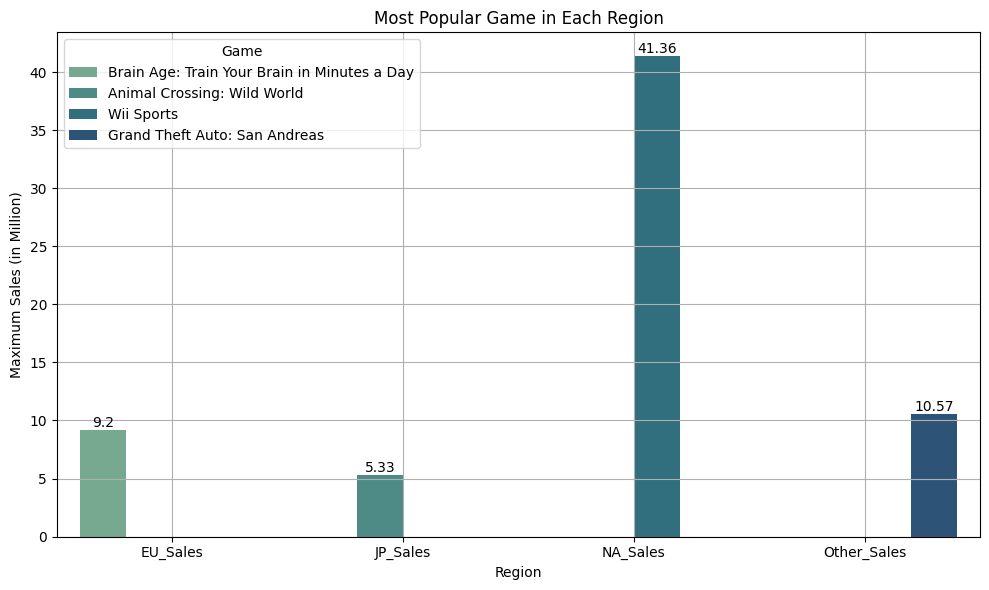

In [60]:
# Step 1: Create a new column for the maximum sales across regions
vg_df['Max_Sales'] = vg_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].max(axis=1)

# Step 2: Create a new column to represent the region with the maximum sales
vg_df['Region_Max_Sales'] = vg_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].idxmax(axis=1)

# Step 3: Group the dataset by the region with maximum sales
grouped_df = vg_df.groupby('Region_Max_Sales')

# Step 4: Retrieve the most popular game in each region
popular_games = grouped_df.apply(lambda x: x.loc[x['Max_Sales'].idxmax()])

# Step 5: Create a bar plot to visualize the most popular game in each region
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
t1=sns.barplot(data=popular_games, x='Region_Max_Sales', y='Max_Sales', hue='Name', palette='crest')
plt.xlabel('Region')
plt.ylabel('Maximum Sales (in Million)')
plt.title('Most Popular Game in Each Region')
plt.grid()
plt.legend(title='Game')
for i in t1.containers:
    t1.bar_label(i,)
# Step 6: Display the plot
plt.tight_layout()  # Adjust the spacing
plt.show()


**14. Which genre of videogames has the most sales?**

`Ans:` Action

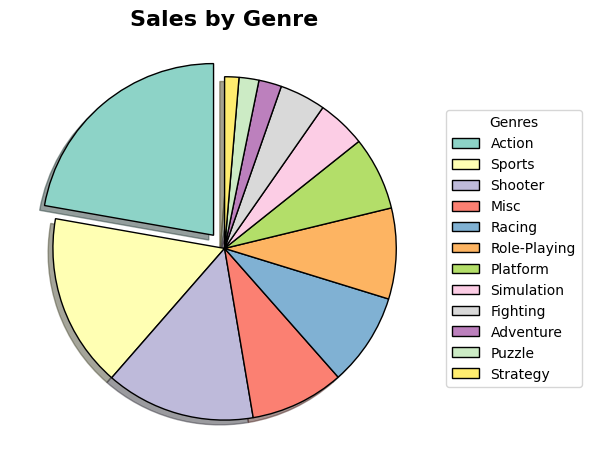

In [41]:
import matplotlib.pyplot as plt

# Step 1: Group the dataset by the 'Genre' column
grouped_df = vg_df.groupby('Genre')

# Step 2: Calculate the total sales for each genre
total_sales = grouped_df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().sum(axis=1)

# Step 3: Sort the genres based on their total sales in descending order
sorted_genres = total_sales.sort_values(ascending=False)

# Step 4: Create a pie chart to visualize the sales by genre
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed

# Define colors for the pie chart
colors = plt.cm.Set3(range(len(sorted_genres.index)))

# Get the top 3 genres and their corresponding percentages
top_genres = sorted_genres.index[:3]
top_percents = [val for idx, val in enumerate(autotexts) if sorted_genres.index[idx] in top_genres]

# Explode the 'Action' slice and create the pie chart with borders and shadow
explode = [0.1 if genre == 'Action' else 0 for genre in sorted_genres.index]
wedges, text, autotexts = plt.pie(sorted_genres, labels=None, autopct='', startangle=90,
                                  colors=colors, explode=explode, wedgeprops={'linewidth': 1, 'edgecolor': 'black'},
                                  shadow=True)

# Set properties for the percentage labels of top genres
plt.setp(top_percents, size=10, weight='bold')

# Set the title and font size
plt.title('Sales by Genre', fontsize=16, fontweight='bold')

# Add a legend outside the pie chart
plt.legend(wedges, sorted_genres.index, title='Genres', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Step 5: Display the plot
plt.tight_layout()  # Adjust the spacing
plt.show()


**15. ???**

`Ans:???`